# IoT - Power energy consumption predict 

In [44]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
#from sklearn.feature_selection import RFECV
from datetime import datetime
from sklearn.datasets import make_regression
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
#from sklearn.feature_selection import RFE

### Variables description

Appliances --> Power consumed

Lights --> Power appliance

Tx --> Temperatura

RH_x --> Umidade Relativa

T_out --> Temperatura fora da casa

Press_mm_hg  --> Unidade de pressão

RH_out --> Umidade fora da casa

Visibility --> Visibilidade

Tdewpoint --> ponto de condensação

rvx --> variavel aleatória

In [3]:
#Import Train and Test dataset
df_train = pd.read_csv('projeto8-training.csv')
df_test = pd.read_csv('projeto8-testing.csv')
print(f'Train dataset has {df_train.shape[0]} lines and {df_train.shape[1]} variables')
print(f'Test dataset has {df_test.shape[0]} lines and {df_test.shape[1]} variables')

Train dataset has 14803 lines and 32 variables
Test dataset has 4932 lines and 32 variables


Both dataset have the same amount of columns. Thus, we can concatenate both datasets

In [4]:
df = pd.concat([df_train, df_test])

### Exploratory Data Analysis

In [5]:
# Evaluate missing values in the dataset
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
NSM            0
WeekStatus     0
Day_of_week    0
dtype: int64

In [6]:
# Evaluate the number of unique elements in the dataset
df.nunique()

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
NSM              144
WeekStatus         2
Day_of_week        7
dtype: int64

In [6]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,42907.129465
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,24940.020831
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,0.000000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,21600.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,43200.000000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,64200.000000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,85800.000000


For a easily understand, let's separate the dataset as **numerical** and **categorical**. The criteria adopted was, if the variable has *less than 10 different values*, it will be considered categorical.

In [7]:
num = [name for name in df.columns if df[name].nunique() > 10]
cat = [name for name in df.columns if df[name].nunique() < 10]
df_num = df[num]
df_cat = df[cat]

In [8]:
#Formating columns Date and separate them into Month, Day and Hour
df_num = df_num.sort_values(['date'], ascending=True)
df_num['date'] = pd.to_datetime(df_num['date'], format='%Y-%m-%d %H:%M:%S')
df_num['Year'] = df_num['date'].dt.year
df_num['Month'] = df_num['date'].dt.month
df_num['Day'] = df_num['date'].dt.day
df_num['Hour'] = df_num['date'].dt.hour

In [9]:
# Transform date column into index.
df_num.index = pd.DatetimeIndex(df_num['date'])
df_cat.index = pd.DatetimeIndex(df_num['date'])

# Adding column 'Date' to future analysis
df_num['date'] = df_num['date'].copy()

### Plot power consumption by month

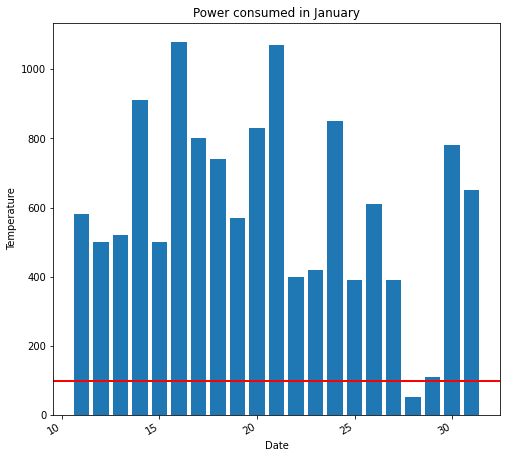

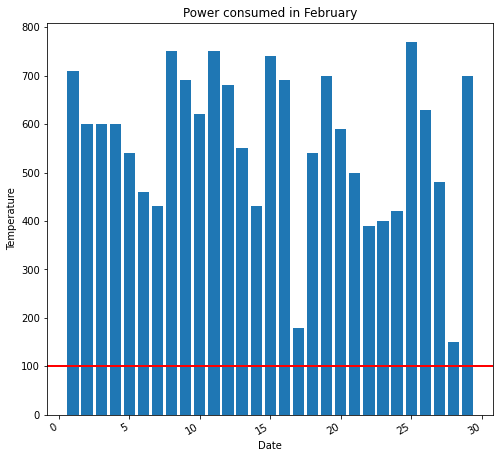

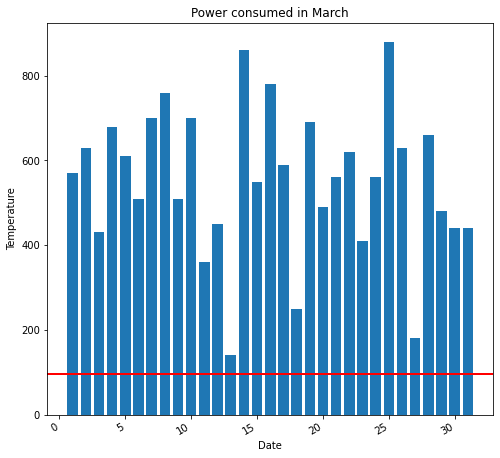

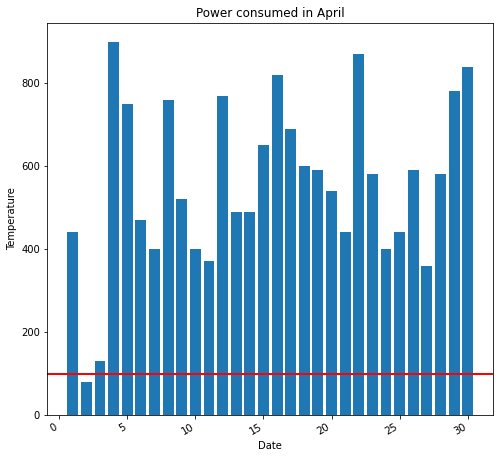

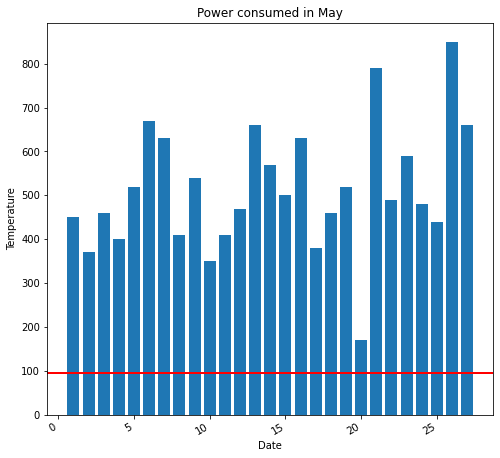

In [27]:
for i in range(6):
    if i == 1:
        fig, ax1 = plt.subplots(figsize=(8, 8))
        plot_1 = df_num[df_num['Month'] == 1]
        mean_1 = plot_1['Appliances'].mean()
        ax1.bar(plot_1['Day'], plot_1['Appliances'])
        ax1.set_title('Power consumed in January')
        ax1.axhline(mean_1, color='red', linewidth=2)
        plt.xlabel("Date")
        plt.ylabel("Temperature")
        fig.autofmt_xdate()
        
    if i == 2:
        fig, ax2 = plt.subplots(figsize=(8, 8))
        plot_2 = df_num[df_num['Month'] == 2]
        mean_2 = plot_2['Appliances'].mean()
        ax2.bar(plot_2['Day'], plot_2['Appliances'])
        ax2.set_title('Power consumed in February')
        ax2.axhline(mean_2, color='red', linewidth=2)
        plt.xlabel("Date")
        plt.ylabel("Temperature")
        fig.autofmt_xdate()
        
    if i == 3:
        fig, ax3 = plt.subplots(figsize=(8, 8))
        plot_3 = df_num[df_num['Month'] == 3]
        mean_3 = plot_3['Appliances'].mean()
        ax3.bar(plot_3['Day'], plot_3['Appliances'])
        ax3.set_title('Power consumed in March')
        ax3.axhline(mean_3, color='red', linewidth=2)
        plt.xlabel("Date")
        plt.ylabel("Temperature")
        fig.autofmt_xdate()
        
    if i == 4:
        fig, ax4 = plt.subplots(figsize=(8, 8))
        plot_4 = df_num[df_num['Month'] == 4]
        mean_4 = plot_4['Appliances'].mean()
        ax4.bar(plot_4['Day'], plot_4['Appliances'])
        ax4.set_title('Power consumed in April')
        ax4.axhline(mean_4, color='red', linewidth=2)
        plt.xlabel("Date")
        plt.ylabel("Temperature")
        fig.autofmt_xdate()
        
    if i == 5:
        fig, ax5 = plt.subplots(figsize=(8, 8))
        plot_5 = df_num[df_num['Month'] == 5]
        mean_5 = plot_5['Appliances'].mean()
        ax5.bar(plot_5['Day'], plot_5['Appliances'])
        ax5.set_title('Power consumed in May')
        ax5.axhline(mean_5, color='red', linewidth=2)
        plt.xlabel("Date")
        plt.ylabel("Temperature")
        fig.autofmt_xdate()

### Plot to visualize the outliers

2016-1 até 2016-5-01 23:00:00 com 2922 pontos


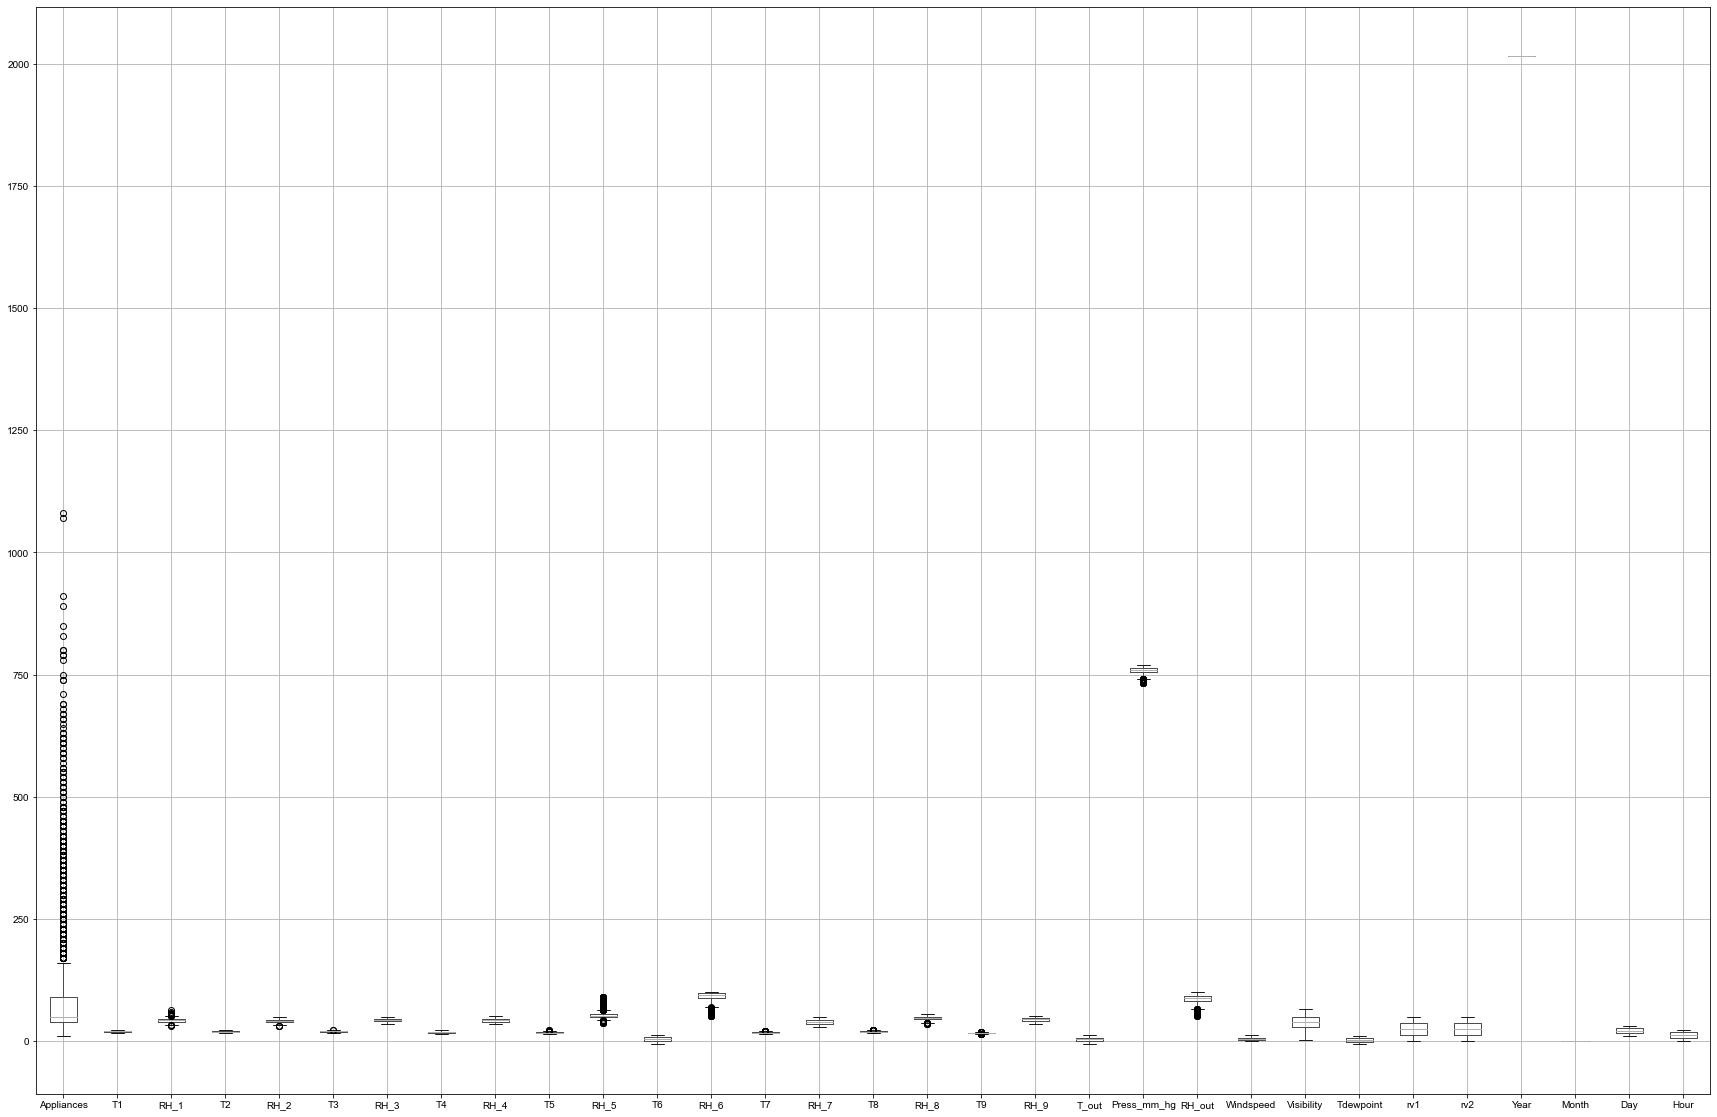

In [28]:
year_start = str(df_num['Year'].min())
month_start = str(df_num['Month'].min())
day = int('01')
# fim
year_end = str(df_num['Year'].max())
month_end = str(df_num['Month'].max())

if day < 10:
    date_start = year_start + '-' + month_start
    date_end = year_end + '-' + month_end + '-' + '0' + str(day) + ' 23:00:00'
else:
    date_start = year_start + '-' + month_start
    date_end = year_end + '-' + month_end + '-' + str(day) + ' 23:00:00'

print(f'{date_start} até {date_end} com {len(df_num[date_start])} pontos')

plt.subplots(figsize=(30, 20))
sns.set(style="ticks", color_codes=True)
df_filter = df_num[date_start]
df_filter = df_filter.drop(['date', 'NSM'], axis=1)
df_filter.boxplot()
plt.show()

Analysing the outliers, we can remove data from "Appliances" that are greater than 150

In [29]:
df_num_v1 = df_num[df_num['Appliances'] < 150.0]
df_num_v1 = df_num_v1.drop(['Year', 'Month', 'Day', 'Hour', 'date'], axis=1)

# Reset index
df_num_v1.reset_index(drop=True, inplace=True)
df_num_v1.index

df_num_v1.head(2)

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM
0,60,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,17.166667,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200
1,60,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,17.166667,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800


## Correlation

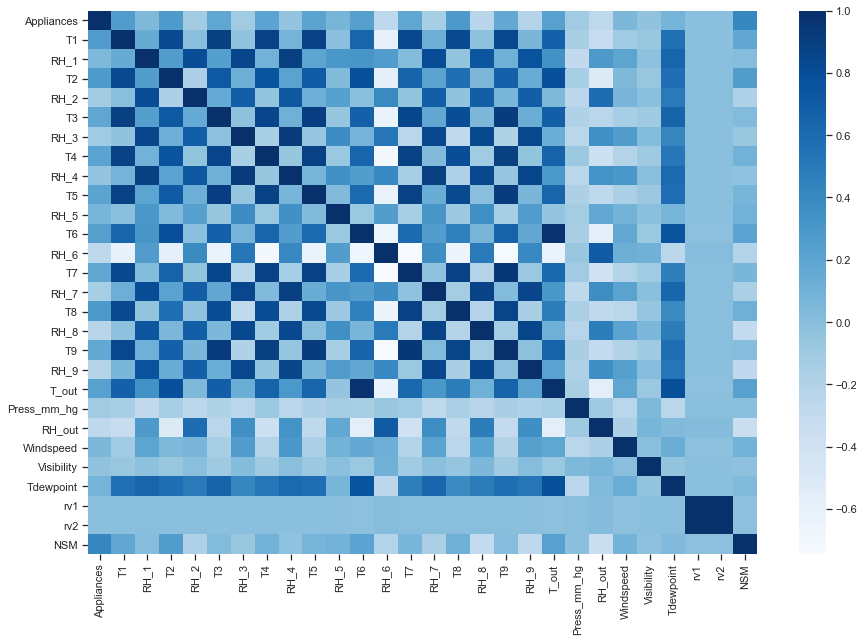

In [30]:
plt.figure(figsize = (15,10))
sns.heatmap(df_num_v1.corr(), cmap="Blues")

In [31]:
#Correlation with output variable
cor_target = abs(df_num_v1.corr()["Appliances"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.2]
relevant_features

Appliances    1.000000
T1            0.266959
T2            0.277459
T4            0.211871
T5            0.205815
T6            0.233250
RH_6          0.255907
T8            0.288726
RH_8          0.229389
RH_9          0.212781
T_out         0.224154
RH_out        0.266875
NSM           0.426494
Name: Appliances, dtype: float64

In [32]:
# Encode the variables that are string
lb = LabelEncoder()

#Adjusting columns into categorical
df['WeekStatus'] = lb.fit_transform(df['WeekStatus'])
df['Day_of_week'] = lb.fit_transform(df['Day_of_week'])
df_v1 = df[df['Appliances'] < 150.0]

## Normalizing data

In [33]:
#Separating target variable
df_v2_target = df_v1['Appliances']
df_v2 = df_v1.drop(['Appliances','date'], axis=1)

In [34]:
# Normalizing dataset
df_norm2 = (df_v2 - df_v2.mean()) / (df_v2.max() - df_v2.min())

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,0.533117,-0.192591,0.229042,-0.078426,0.121150,-0.20437,0.266728,-0.167153,0.282310,-0.233112,...,-0.514897,0.153227,0.217102,0.380114,0.070016,-0.234870,-0.234870,0.228904,-0.277049,-0.347347
1,0.533117,-0.192591,0.201341,-0.078426,0.119252,-0.20437,0.269601,-0.167153,0.300554,-0.233112,...,-0.512564,0.153227,0.193292,0.321139,0.065491,-0.128237,-0.128237,0.235897,-0.277049,-0.347347


## Feature Selection

In [37]:
# Removing variables before fit the model
new_df_norm = df_norm2.drop(['rv1', 'rv2', 'Visibility', 'Press_mm_hg','Tdewpoint'], axis=1)

#Separating target variable for train dataframe
X_array = np.array(new_df_norm)
y_array = np.array(df_v2_target)

#Separating train and test data
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, train_size=0.7)

Feature: 0, Score: 0.03302
Feature: 1, Score: 0.01811
Feature: 2, Score: 0.02112
Feature: 3, Score: 0.02180
Feature: 4, Score: 0.02321
Feature: 5, Score: 0.01899
Feature: 6, Score: 0.02117
Feature: 7, Score: 0.02258
Feature: 8, Score: 0.01877
Feature: 9, Score: 0.02209
Feature: 10, Score: 0.02900
Feature: 11, Score: 0.02180
Feature: 12, Score: 0.03195
Feature: 13, Score: 0.02626
Feature: 14, Score: 0.01794
Feature: 15, Score: 0.09208
Feature: 16, Score: 0.02473
Feature: 17, Score: 0.03125
Feature: 18, Score: 0.03002
Feature: 19, Score: 0.02223
Feature: 20, Score: 0.02448
Feature: 21, Score: 0.01882
Feature: 22, Score: 0.38054
Feature: 23, Score: 0.01451
Feature: 24, Score: 0.01352


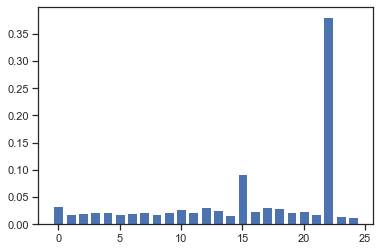

In [41]:
# random forest for feature importance on a regression problem
model = RandomForestRegressor()

# fit the model
model.fit(X_array, y_array)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Predictive Analysis

1) Gradient Boosting Regressor

In [45]:
params = {'n_estimators': 500, 'max_depth': 8, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model_v1 = ensemble.GradientBoostingRegressor(**params)

model_v1.fit(X_train, y_train)
y_pred = model_v1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
print(f"R2 SCORE: {r2score}")

R2 SCORE: 0.7044533450383282


2) Support Vector Regression

In [47]:
model_v2 = SVR()
model_v2.fit(X_train, y_train)
y_pred = model_v2.predict(X_test)
r2score_v2 =  r2_score(y_test, y_pred)
print(f"R2 SCORE: {r2score_v2}")

R2 SCORE: 0.40585495932435556


3) Linear Regression

In [48]:
model_v3 = LinearRegression()
model_v3.fit(X_train, y_train)
y_pred = model_v3.predict(X_test)

r2score_v3 =  r2_score(y_test, y_pred)
print(f"R2 SCORE: {r2score_v3}")

R2 SCORE: 0.36847786034013674


### Conclusion

- The best model for this dataset is Gradient Boosting Regressor. It has an accurancy of 70%
- It will be necessary more data to increase the accuracy of the model